# Audio Preprocessing 

***TASKS***
- clean AudioTransformer class (11.02-oop) and ensure it's functioning correctly
- create class that will run AudioTransformer and store it into a dataframe

In [20]:
import librosa 
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pylab as plt 
import IPython.display as ipd
import random

# below found from https://towardsdatascience.com/audio-deep-learning-made-simple-sound-classification-step-by-step-cebc936bbe5
import torch
import torchaudio
from torchaudio import transforms

In [208]:
class AudioTransformer:
    
    def open_audio(audio_file):
        signal, sr = librosa.load(audio_file, sr=22050, mono=True)
        return (signal, sr)
    
    def same_length(aud):
        max_len = 50000
        sig, sr = aud
        sig_len = len(sig)
        
        if (sig_len > max_len):
            sig = sig[:max_len]
            
        elif (sig_len < max_len):
            diff = max_len - sig_len
            for i in range(0, diff):
                sig = np.append(sig, 0)
        return (sig, sr)
    
    
    def time_shift(aud):
        sig, sr = aud
        shift = int(random.random() * len(sig))
        sig = np.roll(sig, shift)
        return (sig, sr)
    
    def to_spectrogram(aud):
        sig, sr = aud 
        S = librosa.feature.melspectrogram(y=sig, sr=sr, n_mels=128, fmax=8000)
        S_dB = librosa.power_to_db(S, ref=np.max)
        return (S_dB)
    
    def aug_sepctrogram(S_dB, max_mask_pct=0.1):
        freq, time = S_dB.shape
        mask_value = S_dB.mean()
        augmented_melspec = S_dB.copy()
        freq_mask_param = max_mask_pct * freq
        time_mask_param = max_mask_pct * time



# Code copied and edited from https://www.kaggle.com/code/davids1992/specaugment-quick-implementation
        # Frequency masking
        num_freqs_to_mask = int(freq_mask_param * random.uniform(0.5, 1.5))
        print(f'num_freqs_to_mask: {num_freqs_to_mask}')
        f0 = int(np.random.uniform(low = 0.0, high = (freq - num_freqs_to_mask)))
        print(f'f0: {f0}')
        augmented_melspec[:, f0:(f0 + num_freqs_to_mask)] = 0
        # Time masking
        num_frames_to_mask = int(time_mask_param * random.uniform(0.5, 1.5))
        print(f'num_frames_to_mask: {num_frames_to_mask}')
        t0 = int(np.random.uniform(low = 0.0, high = (time - num_frames_to_mask)))
        print(f't0: {t0}')
        
        augmented_melspec[t0:(t0 + num_frames_to_mask), :] = 0
        
        return augmented_melspec

        
        
        
        
            
         
    

In [209]:
aud = AudioTransformer.open_audio('./audio_files/Major/Major_14.wav')
len(aud[0]), aud[1]

(49613, 22050)

In [210]:
same_len = AudioTransformer.same_length(aud)
len(same_len[0]), same_len[1] 

(50000, 22050)

In [211]:
rand_shift = AudioTransformer.time_shift(same_len)

In [212]:
x = AudioTransformer.to_spectrogram(rand_shift)
x

array([[-41.20008022, -47.05311058, -57.2022783 , ..., -56.66744929,
        -57.39774626, -43.35540904],
       [-41.78404731, -47.71329267, -52.04205237, ..., -51.91349165,
        -51.44378178, -42.23444386],
       [-41.32286875, -48.97541853, -53.91168926, ..., -53.93873676,
        -53.948892  , -44.35816636],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

In [221]:
y = AudioTransformer.aug_sepctrogram(x)
y

num_freqs_to_mask: 11
f0: 53
num_frames_to_mask: 6
t0: 69


array([[-41.20008022, -47.05311058, -57.2022783 , ..., -56.66744929,
        -57.39774626, -43.35540904],
       [-41.78404731, -47.71329267, -52.04205237, ..., -51.91349165,
        -51.44378178, -42.23444386],
       [-41.32286875, -48.97541853, -53.91168926, ..., -53.93873676,
        -53.948892  , -44.35816636],
       ...,
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ],
       [-80.        , -80.        , -80.        , ..., -80.        ,
        -80.        , -80.        ]])

[Text(0.5, 1.0, 'Mel-frequency spectrogram')]

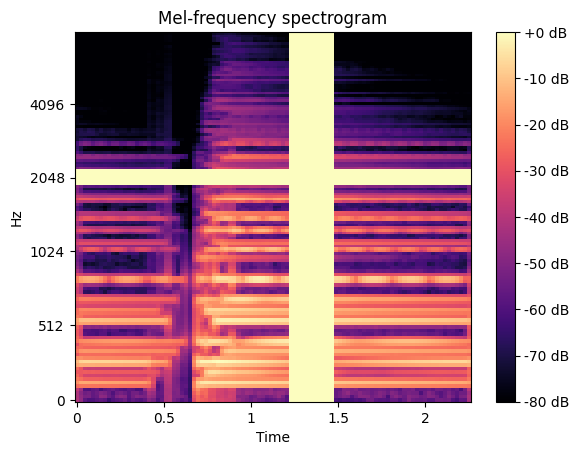

In [222]:
fig, ax = plt.subplots()
img = librosa.display.specshow(y, x_axis='time',
                         y_axis='mel', sr=22050,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

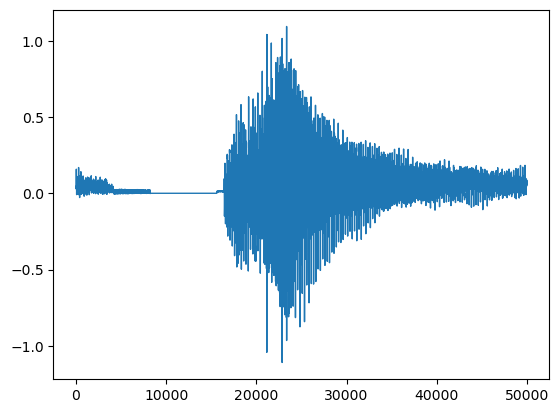

In [181]:
pd.Series(rand_shift[0]).plot(lw=1);

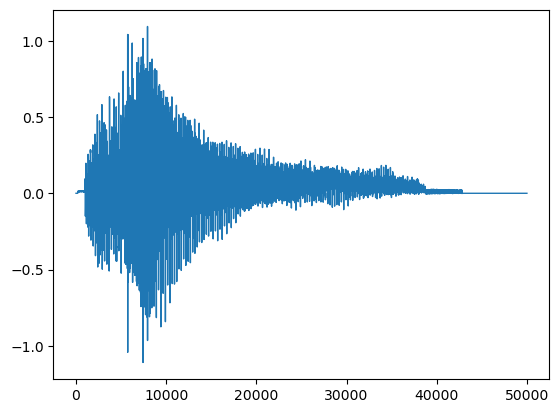

In [182]:
pd.Series(same_len[0]).plot(lw=1);